[딥 러닝을 위한 자연어 처리입문 문서를 요약한 자료입니다.(바로가기)](https://wikidocs.net/22660)

# 워드 임베딩
> 단어를 밀집 표현으로 변환하여 벡터로 만든다.

워드 임베딩을 학습하기 전에 희소표현, 밀집표현, 워드 임베딩에 대해서 알아보자.

### 희소 표현(Sparse Prepresentation)

- 원-핫 벡터들은 표현하고자 하는 단어의 인덱스만 1이고 나머지는 전부 0이다.
이러한 벡터 표현은 공간적 낭비를 불러일으킨다. 희소표현의 일종인 DTM과 같은 경우에도 공간 낭비가 발생한다.
- 이러한 원-핫 벡터는 단어의 의미를 담지 못한다.(유사성을 표현할 수 없다.)

### 밀집표현(Dense Representation)

- 희소 표현과 반대되는 개념
- 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춘다.  
예) 10,000개의 단어가 있을 때 강아지(인덱스 5)란 단어를 표현하기 위해,  
[0 0 0 0 0 1 0 0 0 0 ... ... 0] 과같이 표현했지만,  
벡터표현의 차원을 128로 바꾸어  [0.2 1.8 1.1 -2.1 1.1 2.8 ... ... ]같이 표현
-> 128차원

### 워드 임베딩

- 단어를 밀집 벡터의 형태로 표현하는 방법(임베딩 벡터)
- 희소 표현에서 원-핫 벡터는 단어의 유사성을 표현할 수 없었다.
    - **대안으로 단어의 의미를 여러 차원 공간에 벡터화한다.(분산표현)**
- LSA, Word2Vec, FastText, Glove등의 방법이 있다.

### Word2Vec
   - CBOW: 주변 단어로 **중간 단어** 예측
   - Skip-Gram: 중간 단어로 **주변 단어** 예측

#### 분산 표현(Distributed Representation)
> 분포가설 가정(**'비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다'**) 하에 만들어졌다.

- 이와 같은 벡터들은 차원이 작다.(단어집합 크기일 필요가 없으므로)
- 분산표현방법(단어의 의미를 여러 차원에 분산)은 단어 간 유사도를 계산할 수 있다.

### CBOW(Continuous Bag of Words)
예) The fat cat sat on the mat
- 예측해야 하는 단어(sat)를 'center word'
- 예측에 사용되는 단어를 'context word'라 한다.

- 중심단어를 예측하기 위해 앞, 뒤로 몇 개의 단어를 볼지 결정했다면 이 범위를 Window라고 한다.

![image.png](https://wikidocs.net/images/page/22660/%EB%8B%A8%EC%96%B4.PNG)

- 윈도우를 계속 움직여서 주변 단어와 중심 단어를 바꿔가며 데이터셋을 만든다.(슬라이딩 윈도우)  
CBOW의 인공신경망을 간단히 도식화하면 아래의 그림과 같다
![image.png](https://wikidocs.net/images/page/22660/word2vec_renew_1.PNG)
.
- 입력층(input layer)의 입력으로서 context word의 one-hot벡터가 들어간다.
- 출력층(output layer)에서 예측하고자 하는 center word의 one-hot벡터가 들어간다.
##### takeaways
1) Word2Vec은 하나의 은닉층만이 존재하므로 딥러닝 모델이 아니다.(얕은 신경망)  
2) Word2Vec의 은닉층은 일반적인 은닉층과 달리 활성화함수가 존재하지 않는다.
- Word2Vec의 은닉층은 `룩업 테이블이라는 연산`을 담당하는 층으로 일반적인 은닉층과 구분하기 위해서 투사층(projection layer)이라고 부르기도 한다.

![image.png](https://wikidocs.net/images/page/22660/word2vec_renew_2.PNG)
##### note
1) CBOW의 투사층의 크기가 M이다.
   - CBOW에서 투사층의 크기 M은 임베딩하고 난 벡터의 차원이다.  
  
2) 입력/투사층 사이 가중치W는 V x M행렬이고, 투사/출력층의 가중치W'는 M x V 행렬이다.  
- V: 단어 집합의 크기
- W(V x M행렬)와 W'(M x V행렬)은 서로 다른 행렬이다.
- 훈련 전 두 행렬은 굉장히 작은 랜덤값이지만, 주변 단어로부터 중심 단어를 더 정확히 맞추기 위해 계속 이 두 가중치를 학습해가는 구조이다.

![image.png](https://wikidocs.net/images/page/22660/word2vec_renew_3.PNG)

##### CBOW 동작 매커니즘
입력 원핫벡터x와 가중치W의 곱을 살펴보자.  
- i번째 인덱스에만 1이라는 값을 가지는 x와 W의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과 동일하다. 따라서 Lookup table이라고 한다.

- <u>앞서 CBOW의 목적은 W와 W'를 잘 훈련시키는 것이라고 언급한 적이 있는데, 사실 그 이유가 여기서 lookup해온 W의 각 행벡터가 사실 Word2Vec을 수행한 후의 각 단어의 M차원의 크기를 갖는 임베딩 벡터들이기 때문이다.</u>

![image.png](https://wikidocs.net/images/page/22660/word2vec_renew_4.PNG)

주변 단어의 원-핫 벡터와 가중치 W가 곱해진 결과벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터를 구하게 된다.  

윈도우의 크기가 n=2라면, 입력벡터의 수는 총 2n이므로 단어를 예측하기 위해서 4개가 입력벡터로 사용된다. 그렇기 때문에 4개의 결과 벡터에 대해서 평균을 구하게 된다.  

CBOW는 투사층에서 평균을 구하지만, Skip-Gram은 입력이 중심단어 하나이므로 평균을 구하지 않는다.

![image.png](https://wikidocs.net/images/page/22660/word2vec_renew_5.PNG)
구한 평균벡터는 두번째 가중치 행렬 W'와 곱해진다.  

곱셈의 결과는 입력벡터와 같은 차원이 나온다.  

이 벡터에 CBOW는 softmax를 취하는데, 0~1사이의 실수로, 각 원소의 합은 1이 되는 상태로 바뀐다.이 벡터를 벡터 스코어라고 한다.  

스코어벡터의 j번째 인덱스의 값은 j번째 단어가 중심 단어일 확률을 나타낸다.  

이 스코어벡터는 우리가 알고있는 중심단어 원핫벡터와 가까워져야 한다. 이 두 벡터의 오차를 줄이기 위해 손실함수로 cross-entropy를 사용한다.  
𝑦̂ 을 스코어벡터라고 하자.
$$
H(\hat{y},y) = \sum_{j=1}^{|V|}y_jlog(\hat{y_j})
$$

cross-entropy 함수에 실제 중심 단어인 원-핫 벡터와 스코어 벡터를 입력값으로 넣고, 이를 식으로 표현하면 위와 같다.

그런데 y가 원-핫 벡터이므로 식을 간소화시킬 수 있다.
$$
H(\hat{y},y) = -y_ilog(\hat{y_i})
$$
- 역전파를 수행하면 W와 W'가 학습되는데, 학습이 다 되면 M차원의 크기를 갖는 W의 행이나 W'의 열로부터 어떤 것을 임베딩 벡터로 사용할지를 결정하면 된다. 때로는 두 값의 평균치를 선택하기도 한다.

# Skip-gram code example
지금까지 CBOW에 대해서 알아보았는데, 코드를 통해 skip-gram을 알아보자.

In [1]:
# Skipgram 예시
# 소설 alice in wonderland에 사용된 단어들을 2차원 feature로 vector화 한다.
# -----------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from nltk import pos_tag
from nltk.stem import PorterStemmer
import collections
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [58]:
# 전처리
def preprocessing(text):
    text2 = "".join([" " if ch in string.punctuation else ch for ch in text])
    # 각 라인마다 스펠링 하나하나를 구두점 등이 있는지 비교하며 리스트로 리턴. 있으면 공백, 없으면 그대로
    tokens = nltk.word_tokenize(text2) # > ['Alice', 's', 'Adventures', 'in', 'Wonderland']
    tokens = [word.lower() for word in tokens]
    
    stopwds = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopwds]
    
    tokens = [word for word in tokens if len(word)>=3]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    tagged_corpus = pos_tag(tokens) # [('alic','NNP'), ('Adventures','NP')...
    
    Noun_tags = ['NN','NNP','NNPS','NNS']
    Verb_tags = ['VB','VBD','VBG','VBN','VBP','VBZ']

    lemmatizer = WordNetLemmatizer()

    def prat_lemmatize(token,tag):
        if tag in Noun_tags:
            return lemmatizer.lemmatize(token,'n')
        elif tag in Verb_tags:
            return lemmatizer.lemmatize(token,'v')
        else:
            return lemmatizer.lemmatize(token,'n')
    
    pre_proc_text =  " ".join([prat_lemmatize(token,tag) for token,tag in tagged_corpus])             
    # join해서 다시 한줄씩 리턴한다. 'alic adventur wonderland'와 같은 형태.
    return pre_proc_text

In [59]:
# 소설 alice in wonderland를 읽어온다.
lines = []
fin = open("C:/inkyun/실습파일과 교재/4.자연어쿡북(실습파일)/dataset/alice_in_wonderland.txt", "r")
for line in fin:
    # if len(line) == 0:
    #     continue
    # lines.append(preprocessing(line))
    lines= [preprocessing(line) for line in fin if len(line) > 0]
fin.close()

# 단어들이 사용된 횟수를 카운트 한다.
counter = collections.Counter()

for line in lines:
    for word in nltk.word_tokenize(line):
        counter[word.lower()] += 1
        ## counter는 딕셔너리 형태이므로 하나하나의 word에 대해서 개수를 세어준다.
        
# 사전을 구축한다.
# 가장 많이 사용된 단어를 1번으로 시작해서 번호를 부여한다.
word2idx = {w:(i+1) for i,(w,_) in enumerate(counter.most_common())} # 532번 등장한 say는 1번으로 인덱스 설정
idx2word = {v:k for k,v in word2idx.items()}

In [60]:
# Trigram으로 학습 데이터를 생성한다.
xs = []     # 입력 데이터
ys = []     # 출력 데이터
for line in lines:
    # 사전에 부여된 번호로 단어들을 표시한다.
    embedding = [word2idx[w.lower()] for w in nltk.word_tokenize(line)]
    ## embedding은 'alic adventur wonderland'에서 alic 같은 하나의 w에 대해서 인덱스로 변환하고 리스트로 받는다.
    # Trigram으로 주변 단어들을 묶는다.
    triples = list(nltk.trigrams(embedding))
    ## triples는 [(1,2,8),(2,8,13),(8,13,25)...]와 같이 3개씩 짝지어준다.
    
    # 왼쪽 단어, 중간 단어, 오른쪽 단어로 분리한다.
    w_lefts = [x[0] for x in triples]
    w_centers = [x[1] for x in triples]
    w_rights = [x[2] for x in triples]
    
    # 입력 (xs)      출력 (xy)
    # ---------    -----------
    # 중간 단어 --> 왼쪽 단어
    # 중간 단어 --> 오른쪽 단어
    xs.extend(w_centers)
    ys.extend(w_lefts)
    xs.extend(w_centers)
    ys.extend(w_rights)

# 학습 데이터를 one-hot 형태로 바꾸고, 학습용과 시험용으로 분리한다.
vocab_size = len(word2idx) + 1  # 사전의 크기

ohe = OneHotEncoder(categories = [range(vocab_size)])
X = ohe.fit_transform(np.array(xs).reshape(-1, 1)).todense()
Y = ohe.fit_transform(np.array(ys).reshape(-1, 1)).todense()
Xtrain, Xtest, Ytrain, Ytest, xstr, xsts = train_test_split(X, Y, xs, test_size=0.2) # Q1
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(11092, 1787) (2774, 1787) (11092, 1787) (2774, 1787)


Epoch 1/20
87/87 [==============================] - 2s 24ms/step - loss: 6.7700 - val_loss: 6.4914
Epoch 2/20
87/87 [==============================] - 2s 24ms/step - loss: 6.3824 - val_loss: 6.5428
Epoch 3/20
87/87 [==============================] - 2s 23ms/step - loss: 6.3484 - val_loss: 6.5872
Epoch 4/20
87/87 [==============================] - 2s 23ms/step - loss: 6.3315 - val_loss: 6.5964
Epoch 5/20
87/87 [==============================] - 2s 23ms/step - loss: 6.3168 - val_loss: 6.6341
Epoch 6/20
87/87 [==============================] - 2s 23ms/step - loss: 6.3041 - val_loss: 6.6333
Epoch 7/20
87/87 [==============================] - 2s 24ms/step - loss: 6.2919 - val_loss: 6.6561
Epoch 8/20
87/87 [==============================] - 2s 23ms/step - loss: 6.2686 - val_loss: 6.6362
Epoch 9/20
87/87 [==============================] - 2s 24ms/step - loss: 6.2511 - val_loss: 6.6241
Epoch 10/20
87/87 [==============================] - 2s 23ms/step - loss: 6.2362 - val_loss: 6.6337
Epoch 11/

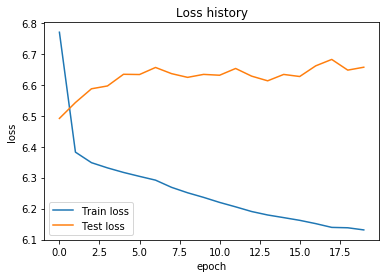

In [61]:
# 딥러닝 모델을 생성한다.
BATCH_SIZE = 128
NUM_EPOCHS = 20

input_layer = Input(shape = (Xtrain.shape[1],), name="input")
first_layer = Dense(300, activation='relu',name = "first")(input_layer)
first_dropout = Dropout(0.5, name="firstdout")(first_layer)
second_layer = Dense(2, activation='relu', name="second")(first_dropout)
third_layer = Dense(300,activation='relu', name="third")(second_layer)
third_dropout = Dropout(0.5,name="thirdout")(third_layer)
fourth_layer = Dense(Ytrain.shape[1], activation='softmax', name = "fourth")(third_dropout)

model = Model(input_layer, fourth_layer)
model.compile(optimizer = "rmsprop", loss="categorical_crossentropy")

# 학습
hist = model.fit(Xtrain, Ytrain, 
                 batch_size=BATCH_SIZE,
                 epochs=NUM_EPOCHS,
                 validation_data = (Xtest, Ytest))

# Loss history를 그린다
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label = 'Test loss')
plt.legend()
plt.title("Loss history")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [62]:
# Extracting Encoder section of the Model for prediction of latent variables
encoder = Model(input_layer, second_layer)

# Predicting latent variables with extracted Encoder model
reduced_X = encoder.predict(Xtest)


# 시험 데이터의 단어들에 대한 2차원 latent feature인 reduced_X를
# 데이터 프레임으로 정리한다.
final_pdframe = pd.DataFrame(reduced_X)
final_pdframe.columns = ["xaxis","yaxis"]
final_pdframe["word_indx"] = xsts
final_pdframe["word"] = final_pdframe["word_indx"].map(idx2word)

# 데이터 프레임에서 100개를 샘플링한다.
rows = final_pdframe.sample(n = 100)
labels = list(rows["word"])
xvals = list(rows["xaxis"])
yvals = list(rows["yaxis"])

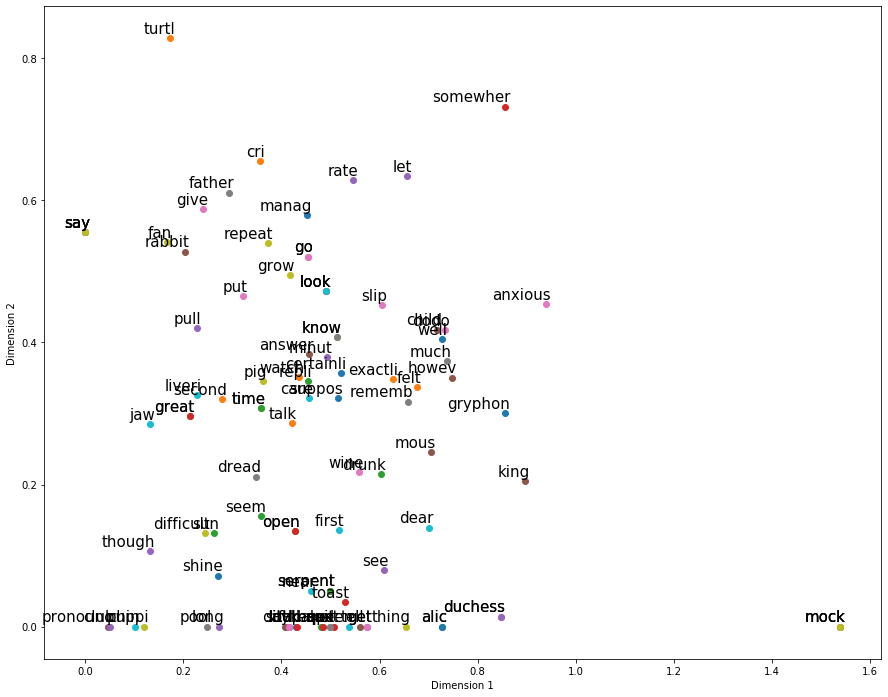

In [63]:
# 샘플링된 100개 단어를 2차원 공간상에 배치한다.
# 거리가 가까운 단어들은 서로 관련이 높은 것들이다.
plt.figure(figsize=(15, 15))  

for i, label in enumerate(labels):
    x = xvals[i]
    y = yvals[i]
    plt.scatter(x, y)
    plt.annotate(label,xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom', fontsize=15)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
f = plt.gcf()
f.set_size_inches(15,12)
plt.show()

# Skip-Gram Negative Sampling (SGNS)